In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
import pandas as pd
from types import NoneType
import os
import scipy as sci
import random
import scipy as sci

import sys

# Path to library directory.
_lib_path = os.path.join('c:' + os.sep, 'Users', 'natha', 'OneDrive', 'Documents', 'GitHub', 'Debiasing_Kepler_Data', 'lib')

# Allows access to modules in the library directory.
if _lib_path not in sys.path:
    sys.path.append(_lib_path)

import system_names

In [3]:
settings = {
    'save_plots': True,
    'show_plots': True,
}

In [4]:
def plot_averaged_power_spectra(system_filepaths, planet = 0, settings = settings):
    p_fft_mean = None
    q_fft_mean = None
    h_fft_mean = None
    k_fft_mean = None

    num_spectra = 0 #len(system_filepaths)

    for system_filepath in system_filepaths:
        data = pd.read_csv(system_filepath)

        p_columns = [column for column in data.columns if 'p' in column]
        q_columns = [column for column in data.columns if 'q' in column]
        h_columns = [column for column in data.columns if 'h' in column]
        k_columns = [column for column in data.columns if 'k' in column]

        multiplicity = len(p_columns)

        assert multiplicity == len(q_columns) == len(h_columns) == len(k_columns)

        for index in range(multiplicity):
            if planet != 0 and index != (planet - 1):
                continue

            p_fft = data[p_columns[index]].astype(float)
            q_fft = data[q_columns[index]].astype(float)
            h_fft = data[h_columns[index]].astype(float)
            k_fft = data[k_columns[index]].astype(float)

            if type(p_fft_mean) == NoneType: 
                p_fft_mean = p_fft
            else:
                p_fft_mean += p_fft

            if type(q_fft_mean) == NoneType:
                q_fft_mean = q_fft
            else:
                q_fft_mean += q_fft

            if type(h_fft_mean) == NoneType:
                h_fft_mean = h_fft
            else:
                h_fft_mean += h_fft

            if type(k_fft_mean) == NoneType:
                k_fft_mean = k_fft
            else:
                k_fft_mean += k_fft

            num_spectra += 1

    p_fft_mean /= num_spectra
    q_fft_mean /= num_spectra
    h_fft_mean /= num_spectra
    k_fft_mean /= num_spectra

    (fig, axes) = plt.subplots(2, 2)
    fig.set_size_inches(8, 8)

    labels = [
        ['h averaged \n$h=e\sin(\omega+\Omega)$', 'k averaged\n$k=e\cos(\omega+\Omega)$'],
        ['p averaged \n$p=\sin(i)\sin(\Omega)$', 'q averaged\n$q=\sin(i)\cos(\Omega)$'],        
    ]

    colors = [
        ['red', 'green'],
        ['orange', 'blue'],
    ]

    ys = [
        [h_fft_mean, k_fft_mean],
        [p_fft_mean, q_fft_mean],
    ]

    periods = data['Period']

    for row in range(len(axes)):
        for column in range(len(axes[row])):
            axis = axes[row][column]

            color = colors[row][column]
            label = labels[row][column]

            y = ys[row][column]

            axis.plot(periods, y, color = color)

            axis.set_ylabel(label)

            axis.set_xscale('log')
            axis.set_xlabel('Period (years)')
            axis.set_xlim(periods.iloc[-1], 1e6)

            axis.grid(True, axis = 'x', alpha = 0.5)

    num_systems = len(system_filepaths)

    fig.subplots_adjust(wspace = 0.35, hspace = 0.25)
    fig.suptitle('Averaged Power Spectra ({n} Systems)'.format(n = num_systems), y = 0.93, fontsize = 20)
    
    if settings['show_plots']:
        plt.show()
    
    if settings['save_plots']:
        path = os.path.join(os.pardir, os.pardir, 'results', 'power_spectra', 'averaged_power_spectra')
        fig.savefig(path, bbox_inches = 'tight', dpi = 300)

In [5]:
def plot_superimposed_power_spectra(system_filepaths, alpha = 0.1, settings = settings):
    (fig, axes) = plt.subplots(2, 2)
    fig.set_size_inches(8, 8)

    labels = [
        ['h\n$h=e\sin(\omega+\Omega)$', 'k\n$k=e\cos(\omega+\Omega)$'],
        ['p\n$p=\sin(i)\sin(\Omega)$', 'q\n$q=\sin(i)\cos(\Omega)$'],        
    ]

    colors = [
        ['red', 'green'],
        ['orange', 'blue'],
    ]

    for system_filepath in system_filepaths:
        data = pd.read_csv(system_filepath)

        periods = data['Period']

        p_columns = [column for column in data.columns if 'p' in column]
        q_columns = [column for column in data.columns if 'q' in column]
        h_columns = [column for column in data.columns if 'h' in column]
        k_columns = [column for column in data.columns if 'k' in column]

        assert len(p_columns) == len(q_columns) == len(h_columns) == len(k_columns)

        for index in range(len(p_columns)):
            p_fft = data[p_columns[index]]
            q_fft = data[q_columns[index]]
            h_fft = data[h_columns[index]]
            k_fft = data[k_columns[index]] 

            ys = [
                [h_fft, k_fft],
                [p_fft, q_fft],
            ]

            for row in range(len(axes)):
                for column in range(len(axes[row])):
                    axis = axes[row][column]

                    color = colors[row][column]
                    label = labels[row][column]

                    y = ys[row][column]

                    axis.plot(periods, y, color = color, alpha = alpha)

                    axis.set_ylabel(label)

                    axis.set_xscale('log')
                    axis.set_xlabel('Period (years)')

                    axis.grid(True, axis = 'x', alpha = 0.5)

    fig.subplots_adjust(wspace = 0.35, hspace = 0.25)

    num_systems = len(system_filepaths)

    fig.suptitle('Superimposed Power Spectra ({n} Systems)'.format(n = num_systems), y = 0.93, fontsize = 20)

    if settings['show_plots']:
        plt.show()
    
    if settings['save_plots']:
        path = os.path.join(os.pardir, os.pardir, 'results', 'power_spectra', 'superimposed_power_spectra')
        fig.savefig(path, bbox_inches = 'tight', dpi = 300)

In [6]:
RANDOM = 0
ALIGNED = 1

global_hist_data = {
    RANDOM: [
        [],
        [],
    ],
    ALIGNED: [
        [],
        [],
    ]
}

In [7]:
def gaussian_curve(x, mean, std):
    return ( 1.0 / (std*np.sqrt(2.0*np.pi)) ) * np.exp( -np.square(x-mean) / (2.0*np.square(std)) )

In [16]:
def plot_power_spectra_histogram(system_filepaths,
                                 bins = 100,
                                 period_range = None,
                                 peak_period_range = None,
                                 peak_height_range = (0, 0),
                                 gaussian_ranges = None,
                                 fit_gaussian = True,
                                 savename = 'power_spectra_histogram',
                                 title = 'Power Spectra Multiplicity-1 Peaks Distribution ({n} Systems)',
                                 settings = settings):
    '''
    Plots the power spectra peaks as a histogram.
    
    Parameters:
    -system_filepaths: A list that contains the filepaths to the .csv files containing the FFTs.

    -bins: The number of bins to draw for the histogram.

    -range: The range of peaks to bin. For first element (peak_height_range[0]), 0 = highest peak, otherwise used as 'peak start = multiplicity - planet_range[0] - 1'.
    Last element (peak_height_range[1]) is always used as 'peak end = multiplicity - planet_range[1] - 1'. So (0, 2) for a 5-planet system would bin the peaks from index 0 to index 3 (5-2-1=2);
    (3, 1) for a 6-planet system would bin the peaks from index 2 (6-3-1=2) to index 4 (6-1-1=4).
    '''

    # Flags for indexing dictionaries and lists.
    RANDOM = 0
    ALIGNED = 1

    # Keys for indexing dictionaries. Each element represents one of the vector components.
    vector_components_labels = ['p', 'q', 'h', 'k']

    # Stores the peaks from the transformed signals.
    transformed_signal_peaks = dict()

    # Stores the number of peaks in the histogram.
    num_peaks = {RANDOM: 0, ALIGNED: 0}

    # Populates the transformed peaks dictionary with the proper data structures.
    for label in vector_components_labels:
        transformed_signal_peaks[label] = {RANDOM: list(), ALIGNED: list()}

    # Loops through each system filepath.
    for system_filepath in system_filepaths:
        # Caches the system data from the .csv file as a pandas dataframe.
        system_data = pd.read_csv(system_filepath)

        # Accesses the periods data from the system data.
        periods = system_data['Period']

        # Initializes a columns dictionary.
        columns = dict()

        # Populates the columns dictionary such that columns under each vector component category (p, q, h, k) correspond to columns
        # in the .csv file for those same components.
        for label in vector_components_labels:
            columns[label] = [column for column in system_data.columns if label in column]

        # Gaurds against index errors.
        assert len(columns['p']) == len(columns['q']) == len(columns['h']) == len(columns['k'])

        # Sets the multiplicity. The length of each category of column must be the same due to the above assert, so the choice for 'p' is arbitrary. 
        multiplicity = len(columns['p'])

        # Loops through the range of multiplicity in the system.
        for index in range(multiplicity):
            # Loops through each possible key in the system.
            for label in vector_components_labels:
                transformed_signal = system_data[columns[label][index]].astype(float)

                peak_indices = np.array(sorted(sci.signal.find_peaks(transformed_signal, height = 0)[0], key = lambda index: transformed_signal[index], reverse = True))

                # Gets the difference between the last two periods (first two frequencies).
                difference = transformed_signal.iloc[1] - transformed_signal.iloc[2]

                # Checks if the function is increasing (difference > 0) or passed a maximum (difference == 0).
                if ((len(peak_indices) > 0 and 1 not in peak_indices[0:multiplicity-1]) or len(peak_indices) == 0) and difference > 0 or difference == 0:
                    # Appends the peak.
                    peak_indices = np.insert(peak_indices, 0, 1)

                # Gets the range of planets to bin over.
                min_index = 0 if (peak_height_range[0] == 0) else multiplicity - peak_height_range[0] - 1
                max_index = multiplicity - peak_height_range[1] - 1

                # Calculates the periods.
                frequency_spacing = abs(1.0/periods[1] - 1.0/periods[0])
                peak_frequencies = frequency_spacing * peak_indices[min_index:max_index]
                peak_periods = (1.0 / peak_frequencies)
                
                if type(peak_period_range) != NoneType:
                    min_index = peak_period_range[0]
                    max_index = peak_period_range[1]

                    peak_periods = np.sort(peak_periods)[min_index:max_index]

                system_name = system_filepath.split(os.sep)[-1]
                suffix = '_randomO'

                # If the suffix is in the system name, choose the RANDOM key.
                Omega_type = [ALIGNED, RANDOM][(suffix in system_name)]

                transformed_signal_peaks[label][Omega_type].extend(peak_periods)

    (fig, axes) = plt.subplots(2, 2)
    fig.set_size_inches(8, 8)

    labels = [
        ['h density (integral of distribution = 1)\n$h=e\sin(\omega+\Omega)$', 'k density (integral of distribution = 1)\n$k=e\cos(\omega+\Omega)$'],
        ['p density (integral of distribution = 1)\n$p=\sin(i)\sin(\Omega)$', 'q density (integral of distribution = 1)\n$q=\sin(i)\cos(\Omega)$'],        
    ]

    colors = {
        RANDOM: [
            ['blue', 'blue'],
            ['blue', 'blue'],
        ],
        ALIGNED: [
            ['red', 'red'],
            ['red', 'red'],
        ],
    }
    
    ys = {
        RANDOM: [
            [transformed_signal_peaks['h'][RANDOM], transformed_signal_peaks['k'][RANDOM]],
            [transformed_signal_peaks['p'][RANDOM], transformed_signal_peaks['q'][RANDOM]],
        ],
        ALIGNED: [
            [transformed_signal_peaks['h'][ALIGNED], transformed_signal_peaks['k'][ALIGNED]],
            [transformed_signal_peaks['p'][ALIGNED], transformed_signal_peaks['q'][ALIGNED]],
        ],
    }

    bin_range = None

    for row in range(len(axes)):
        for column in range(len(axes[row])):
            axis = axes[row][column]

            # Arrays of size 2 (binary).
            (mean_fit, std_fit) = (np.empty(2), np.empty(2))

            for Omega_type in [ALIGNED, RANDOM]:                    
                color = colors[Omega_type][row][column]
                data = np.array(ys[Omega_type][row][column])
                
                # Checks if the period range was given as an input.                
                if type(period_range) != NoneType:
                    # Gets the minimum and maximum period from the period_range tuple.
                    (min_period, max_period) = period_range

                    # Gets the proper periods range using boolean indexing.
                    data = data[(data > min_period) & (data < max_period)]

                log_data = np.log10(data)

                (y, x) = np.histogram(log_data, bins = bins, range = bin_range, density = True)

                mean_guess = np.mean(log_data)
                std_guess = np.std(log_data)
                parameter_guess = [mean_guess, std_guess]

                if type(bin_range) == NoneType:
                    bin_range = (x.min(), x.max())

                # Removes the last element of the array to prevent value errors when using plt.bar.
                x = np.delete(x, -1)

                # Normalizes the y-axis.
                #y = np.round((y / num_peaks) * 100.0, 2)

                # Gaurds against index errors.
                assert len(x) == len(y)

                if type(gaussian_ranges) == NoneType:
                    (mean_fit[Omega_type], std_fit[Omega_type]) = sci.optimize.curve_fit(gaussian_curve, x, y, parameter_guess)[0]
                else:
                    fitting_mask = (x > gaussian_ranges[row][column][0]) & (x < gaussian_ranges[row][column][1])

                    x_fit = x[fitting_mask]
                    y_fit = y[fitting_mask]

                    (mean_fit[Omega_type], std_fit[Omega_type]) = sci.optimize.curve_fit(gaussian_curve, x_fit, y_fit, p0 = parameter_guess)[0]

                # Spacing between bins.
                spacing = abs(x[1] - x[0])

                axis.bar(x, y, spacing, color = color, alpha = 0.5, align = 'edge')
                axis.yaxis.set_major_locator(tck.LinearLocator(11))
                axis.xaxis.set_major_locator(tck.LinearLocator(5))
                axis.set_axisbelow(True)
                axis.grid(True, axis = 'y', alpha = 0.18)

            label = labels[row][column]
            axis.set_ylabel(label)
            axis.set_xlabel('$\log_{10}($Period [years]$)$')
            axis.minorticks_on()

            (x_min, x_max) = axis.get_xlim()
            (y_min, y_max) = axis.get_ylim()

            if type(period_range) != NoneType:
                # Gets the minimum and maximum period from the period_range tuple.
                display_bounds = np.log10(period_range)
                    
                axis.set_xlim(display_bounds)
            else:
                axis.set_xlim(2, 6)
                axis.set_ylim(y_min, y_max)

                # Draws only once.                    
                axis.vlines(2.3, y_min, y_max, color = 'black', alpha = 0.5, linestyles = 'dashed')
                axis.text(2.35, y_max * 0.9, 'Nyquist\nFrequency', color = 'black', fontsize = 7)   

            if fit_gaussian:
                x_gaussian = np.linspace(x_min, x_max, 100)

                for Omega_type in [RANDOM, ALIGNED]:
                    y_gaussian = gaussian_curve(x_gaussian, mean_fit[Omega_type], std_fit[Omega_type])
                    axis.plot(x_gaussian, y_gaussian, color = colors[Omega_type][row][column])
                
                std_label_random = '$\sigma=%.3f$' % std_fit[RANDOM]
                std_label_aligned = '$\sigma=%.3f$' % std_fit[ALIGNED]

                print('({r}, {c})'.format(r = row, c = column), 'Random mu:', mean_fit[RANDOM])
                print('({r}, {c})'.format(r = row, c = column), 'Aligned mu:', mean_fit[ALIGNED])

                width = x_max - x_min

                axis.text(x_min, y_max * 1.01, std_label_random, color = colors[RANDOM][row][column])
                axis.text(x_min + width * 0.3, y_max * 1.01, std_label_aligned, color = colors[ALIGNED][row][column])
                axis.text(x_min + width * 0.6, y_max * 1.011, '$[\log_{10}($years$)]$', color = 'black')

    num_systems = len(system_filepaths)

    fig.subplots_adjust(wspace = 0.45, hspace = 0.25)
    fig.suptitle(title.format(n = num_systems), y = 0.93, fontsize = 14)
    fig.legend(['_', 'Aligned $\Omega$', 'Random $\Omega$'], loc = (0.81, 0.868), fontsize = 8)

    if settings['show_plots']:
        plt.show()
    
    if settings['save_plots']:
        path = os.path.join(os.pardir, os.pardir, 'results', 'power_spectra', savename)
        fig.savefig(path, bbox_inches = 'tight', dpi = 300)

In [17]:
def plot_peaks(system_filepaths, planet = 0, settings = settings):
    '''
    Plots the peaks of a system's power spectra.
    '''
    
    # Validates the input.
    if type(system_filepaths) != list:
        raise Exception('Please input the filepaths as a list! Input was not a list.')
    
    # Loops through each system filepath.
    for system_filepath in system_filepaths:
        # Initializes a plot.
        (fig, axes) = plt.subplots(2, 2, )

        # Sets the plot size to 16x16 inches.
        fig.set_size_inches(14, 14)
    
        # Accesses the data.
        system_data = pd.read_csv(system_filepath)

        # Gets the periods for each row.
        periods = system_data['Period']

        p_columns = [column for column in system_data.columns if 'p' in column]
        q_columns = [column for column in system_data.columns if 'q' in column]
        h_columns = [column for column in system_data.columns if 'h' in column]
        k_columns = [column for column in system_data.columns if 'k' in column]

        data_columns_matrix = [
            [h_columns, k_columns],
            [p_columns, q_columns],
        ]

        color_matrix = [
            ['red', 'green'],
            ['orange', 'blue'],
        ]

        label_matrix = [
            ['h', 'k'],
            ['p', 'q'],
        ]

        # Calculates the system multiplicity (how many planets in the system).
        multiplicity = len(p_columns)

        # Gaurds against index errors.
        assert multiplicity == len(q_columns) == len(h_columns) == len(k_columns)

        # Extracts the system name from the filepath.
        system_name = system_filepath.split(os.sep)[-1].replace('.csv', '')

        # Sets the system title.
        title = 'Multiplicity-1 Peaks ({M} Planet System)\n{system}'.format(M = multiplicity, system = system_name)

        # Titles the plot.
        fig.suptitle(title, fontsize = 25, y = 0.95)

        # Loops through the axes to plot onto.
        for row in range(len(axes)):
            for column in range(len(axes[row])):
                # Gets the axis.
                axis = axes[row][column]

                ylabel = label_matrix[row][column]

                # Sets the x-scale to logarithmic.
                axis.set_xscale('log')
                axis.set_ylabel(ylabel, fontsize = 15)
                axis.set_xlabel('Period [years]', fontsize = 15)

                color = color_matrix[row][column]

                # Loops through the FFT transform for each planet in the system.
                for transformed_signal_column in data_columns_matrix[row][column]:
                    # Skips data from planets other than that specified.
                    if planet != 0 and str(planet) not in transformed_signal_column:
                        continue

                    # Gets the transformed signal.
                    transformed_signal = system_data[transformed_signal_column].astype(float)

                    # Gets the indices where peaks occur in the transformed signal.
                    peak_indices = np.array(sorted(sci.signal.find_peaks(transformed_signal, height = 0)[0], key = lambda index: transformed_signal[index], reverse = True))

                    # Gets the difference between the last two periods (first two frequencies).
                    difference = transformed_signal.iloc[1] - transformed_signal.iloc[2]

                    # Checks if the function is increasing (difference > 0) or passed a maximum (difference == 0).
                    if ((len(peak_indices) > 0 and 1 not in peak_indices[0:multiplicity-1]) or len(peak_indices) == 0) and difference > 0 or difference == 0:
                        # Appends the peak at the end of the data.
                        peak_indices = np.insert(peak_indices, 0, 1)

                    # Calculates the spacing between frequencies.
                    frequency_spacing = abs(1/periods[1] - 1/periods[0])

                    peak_indices = peak_indices[0:multiplicity-1]
                    peaks = (peak_indices * frequency_spacing)
                    peak_periods = 1/peaks

                    # Ensures no peaks are below 1 (10^0 = 1) so the vertical lines can be plotted from 0->peak.
                    assert len(peak_periods[(peak_periods < 0)]) == 0

                    # Plots the data.
                    axis.plot(periods, transformed_signal, color = color, alpha = 0.5)
                    axis.scatter(periods, transformed_signal, color = color)
                    axis.vlines(peak_periods, 0, transformed_signal[peak_indices], linestyles = 'solid', color = 'black')
                    axis.hlines(0, 0, 1e6, linestyles = 'dashed', color = 'black', alpha = 0.5)

        # Saves the plots if the settings has been enabled.        
        if settings['save_plots']:
            savepath = os.path.join(os.pardir, os.pardir, 'results', 'power_spectra', 'data_validation', system_name)
            fig.savefig(savepath, dpi = 300, bbox_inches = 'tight')

In [18]:
def plot_peaks_many(num):
    systems_filepath = os.path.join(os.pardir, os.pardir, 'data', 'processed', 'vectors')
    systems_filenames = np.array(os.listdir(systems_filepath))

    indices = [random.randint(0, len(systems_filenames)) for count in range(num)]

    files = [os.path.join(systems_filepath, file) for file in systems_filenames[indices]]

    plot_peaks(files)

In [19]:
def shift_right(array, index, val):
    result = np.empty(len(array), int)
    
    if index != 0:
        result[0:index] = array[0:index]

    result[index] = val

    for idx in range(index+1, len(array)):
        result[idx] = array[idx-1]

    return result

def find_indices_by_highest(search_array, num):
    indices = np.arange(num)

    # Loops from num to the end of the array to search (to check all values).
    for search_index in range(len(search_array)):
        # For each index check, loops to the end of the results array to see if a value is high enough.
        for results_index in range(len(indices)):
            # Gets the value at the current search index.
            search_value = search_array[search_index]
            current_result = search_array[indices[results_index]]

            if search_value > current_result:
                indices = shift_right(indices, results_index, search_index)

                break
    
    return indices

In [20]:
path = os.path.join(os.pardir, os.pardir, 'data', 'processed', 'vectors')
files = os.listdir(path)

for unstable_system in system_names.unstable_systems:
    if unstable_system in files:
        files.remove(unstable_system)

system_filepaths = [os.path.join(path, file) for file in files]

In [ ]:
plot_peaks(['..\\..\\data\\processed\\vectors\\sysSim_996.csv'], planet = 3)

(0, 0) Random mu: 3.7658222413350644
(0, 0) Aligned mu: 3.908509552823612
(0, 1) Random mu: 3.758852357062878
(0, 1) Aligned mu: 3.9113309831418324
(1, 0) Random mu: 3.709349248012055
(1, 0) Aligned mu: 3.7745327066808034
(1, 1) Random mu: 3.7119161605797717
(1, 1) Aligned mu: 3.797651210184486


C:\Users\natha\AppData\Local\Temp\ipykernel_17184\428373019.py:241: UserWarning: The label '_' of <matplotlib.collections.LineCollection object at 0x0000023026CC8090> starts with '_'. It is thus excluded from the legend.
  fig.legend(['_', 'Aligned $\Omega$', 'Random $\Omega$'], loc = (0.81, 0.868), fontsize = 8)


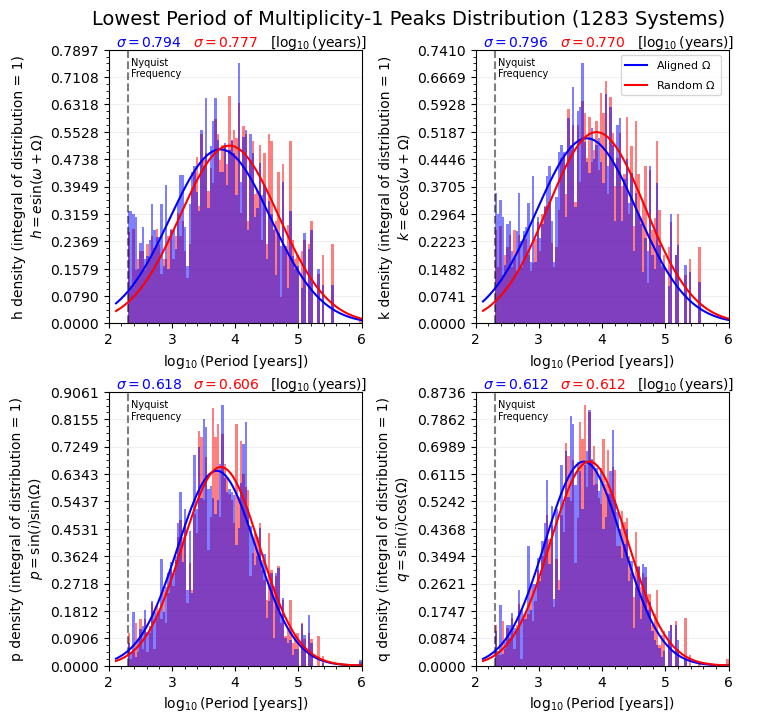

In [21]:
gaussian_ranges = [
    [(2.5, 6.0), (2.5, 6.0)],
    [(2.0, 6.0), (2.0, 6.0)]
]

plot_power_spectra_histogram(system_filepaths, gaussian_ranges = gaussian_ranges, peak_period_range = (0, 1), savename = 'power_spectra_histogram_lowest_period', title = 'Lowest Period of Multiplicity-1 Peaks Distribution ({n} Systems)')

In [ ]:
plot_power_spectra_histogram(system_filepaths, gaussian_ranges = gaussian_ranges, peak_period_range = (0, 1), savename = 'power_spectra_histogram_lowest_period', title = 'Lowest Period of Multiplicity-1 Peaks Distribution ({n} Systems)')

In [ ]:
savename = 'power_spectra_histogram_short_period'
title = 'Zoomed Power Spectra Multiplicity-1 Peaks Distribution ({n} Systems)'
period_range = (10.0**2.25, 10.0**3.25)

plot_power_spectra_histogram(system_filepaths, period_range = period_range, fit_gaussian = False, savename = savename, title = title)

C:\Users\natha\AppData\Local\Temp\ipykernel_25704\543538944.py:226: UserWarning: The label '_' of <BarContainer object of 19 artists> starts with '_'. It is thus excluded from the legend.
  fig.legend(['_', 'Aligned $\Omega$', 'Random $\Omega$'], loc = (0.81, 0.868), fontsize = 8)


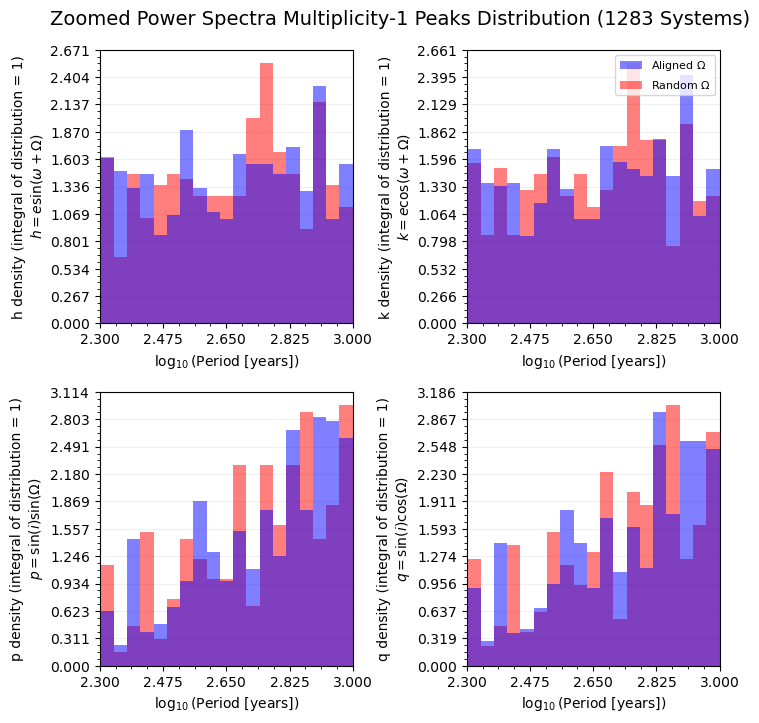

In [81]:
plot_power_spectra_histogram(system_filepaths, bins = 19, fit_gaussian = False, period_range = (10.0**2.3, 10.0**3), savename = 'power_spectra_histogram_zoomed', title = 'Zoomed Power Spectra Multiplicity-1 Peaks Distribution ({n} Systems)')

(0, 0) Random mu: 4.244387779770558
(0, 0) Aligned mu: 4.433538768866883
(0, 1) Random mu: 4.242271438686242
(0, 1) Aligned mu: 4.444210993744294
(1, 0) Random mu: 4.062843583216815
(1, 0) Aligned mu: 4.148266145351244
(1, 1) Random mu: 4.066623234861715
(1, 1) Aligned mu: 4.167727254929838


C:\Users\natha\AppData\Local\Temp\ipykernel_17184\428373019.py:241: UserWarning: The label '_' of <matplotlib.collections.LineCollection object at 0x000002302A7D6890> starts with '_'. It is thus excluded from the legend.
  fig.legend(['_', 'Aligned $\Omega$', 'Random $\Omega$'], loc = (0.81, 0.868), fontsize = 8)


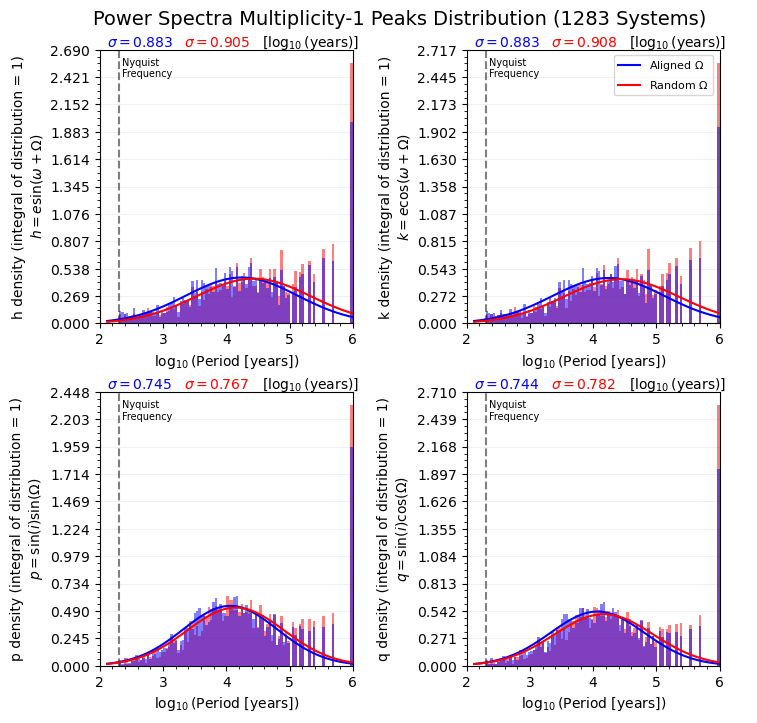

In [22]:
gaussian_ranges = [
    [(2.0, 5.0), (2.0, 5.0)],
    [(2.0, 5.0), (2.0, 5.0)]
]

plot_power_spectra_histogram(system_filepaths, gaussian_ranges = gaussian_ranges)

[-0.0001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001, -0.0001, 0.0, 0.0, 0.0, 0.0, 0.0001, -0.0001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001, -0.0001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001, -0.0001, 0.0001, -0.0001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001, -0.0001, 0.0001, 0.0, -0.0001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001, -0.0001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001, -0.0001, 0.0001, -0.0001, 0.0001, -0.0001, 0.0, 0.0, 0.0, 0.0002, -0.0002, 0.0, 0.0, 0.0, 0.0001, 0.0, 0.0, -0.0001, 0.0, 0.0, 0.0, 0.0, 0.0001, 0.0, 0.0001, -0.0001, 0.0, 0.0, 0.00

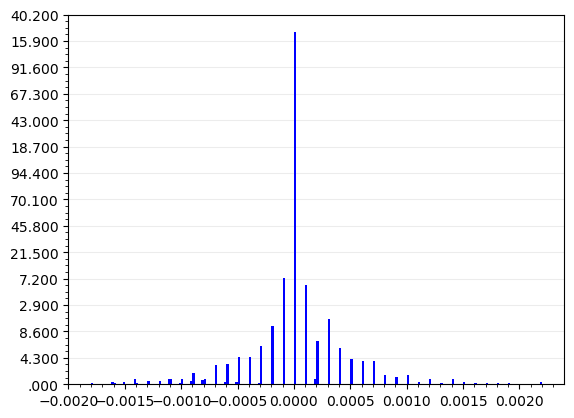

In [131]:
N = 10000

data = np.random.normal(0.0, 1.0, N)

(y, x) = np.histogram(data, bins = 1000)

y = y/len(data)
x = np.delete(x, -1)

spacing = x[1] - x[0]
len_data = len(data)

axis = plt.subplot(1,1,1)

#axis.hist(data, bins = 100, alpha = 0.2, cumulative=True, density=True)
#axis.bar(x, y, spacing, color = 'red', align = 'edge', edgecolor = (0, 0, 0), linewidth = 0.1)
axis.yaxis.set_major_formatter(tck.FuncFormatter(lambda y, pos: ('%.3f' % y)[1:]))
axis.yaxis.set_major_locator(tck.LinearLocator(15))
axis.minorticks_on()
axis.set_axisbelow(True)
axis.grid(True, axis = 'y', alpha = 0.15, color = (0.5, 0.5, 0.5))

diffs = []

for index in range(len(y)-1):
    y1 = y[index]
    y2 = y[index+1]

    diffs.append(y2-y1)

print(diffs)

output = axis.hist(diffs, 200, color = 'blue')

0.5740238730868099


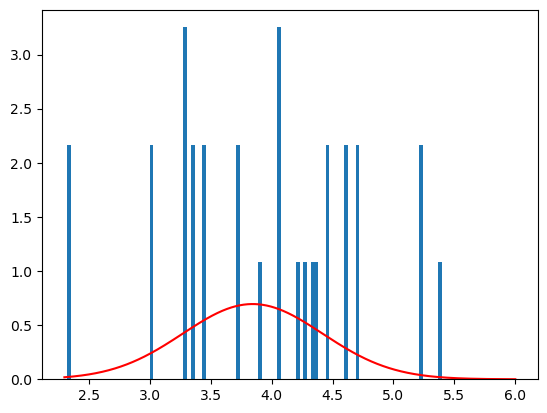

In [59]:
(xs, ys, spacing) = global_hist_data[ALIGNED][0][0]

diff = []

offset = (0, 0)

for index in range(offset[0], len(ys)-offset[1]-1):
    y1 = ys[index]
    y2 = ys[index+1]
    y = ys[index]

    diff.append(y2 - y1)

plt.bar(xs, ys, spacing, align = 'edge')

std = np.std(ys) - 0.2
mean = xs.mean()

print(std)

SMOOTHNESS = 1000
xs2 = np.linspace(2.3, 6, SMOOTHNESS)
ys2 = 1.0/(std*np.sqrt(2.0*np.pi)) * np.exp(-np.square(xs2-mean)/(2.0*std**2.0))

plt.plot(xs2, ys2, color = 'red')